# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [2]:
from sklearn.metrics import calinski_harabasz_score as ch

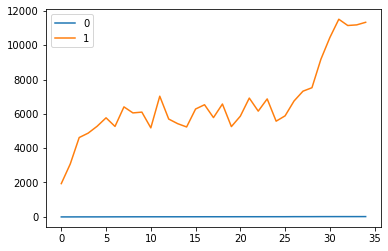

In [3]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
pd.DataFrame(data).plot()

### Simple GA mechanism

## Challenge 231 (_max score - 50 points_)
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [4]:
# Your code here

The population of the first generation: 
[[1266  292 3691 6676]
 [8333 2767 8736 6154]
 [7564 7111 3851 6221]
 ...
 [2883 7517 7389 6485]
 [4321 1701 1441 7579]
 [3412 9078 8745 9392]]

Evolution:
Generation =  0 	Best fitness =  6697588178.87386
0
Generation =  1 	Best fitness =  6410090990.57698
0
Generation =  2 	Best fitness =  6410090990.57698
1
Generation =  3 	Best fitness =  6410090990.57698
2
Generation =  4 	Best fitness =  4830933744.38854
0
Generation =  5 	Best fitness =  3409981146.27997
0
Generation =  6 	Best fitness =  60115503.86841
0
Generation =  7 	Best fitness =  4566422.17283
0
Generation =  8 	Best fitness =  389165.30332
0
Generation =  9 	Best fitness =  3958.78172
0
Generation =  10 	Best fitness =  1450.17396
0
Generation =  11 	Best fitness =  1450.17396
1
Generation =  12 	Best fitness =  388.33234
0
Generation =  13 	Best fitness =  388.33234
1
Generation =  14 	Best fitness =  231.22699
0
Generation =  15 	Best fitness =  41.68187
0
Generation =  16 	Bes

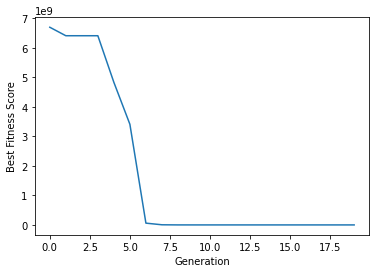

In [5]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        for event in range(len(data)):
            error = 0;
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    probabilities = np.array(fitness)/np.sum(fitness)
    return pop[np.random.choice(np.arange(pop.shape[0]),size=int(num_parents),p=probabilities,replace=False)]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.random.randint(1,offspring_size[1])
    parent_list = parents.tolist()
    for k in range(0,offspring_size[0],2):
#         print(len(parent_list))
        parent1=parent_list.pop(np.random.randint(len(parent_list)))
        parent2=parent_list.pop(np.random.randint(len(parent_list)))
        offspring[k, 0:recombination_point] = parent1[:recombination_point]
        offspring[k, recombination_point:] = parent2[recombination_point:]
        offspring[k+1, 0:recombination_point] = parent2[:recombination_point]
        offspring[k+1, recombination_point:] = parent1[recombination_point:]
    return offspring

def mutation(offspring_recombination,mutation_rate=0.5):
    min_scale=offspring_recombination.min()
    max_scale=offspring_recombination.max()
    for idx in range(offspring_recombination.shape[0]):
        if np.random.binomial(1,mutation_rate)==1:
            random_value = np.random.randint(-100, 100, 1)
            random_index = np.random.randint(0,offspring_recombination.shape[1],1)
            offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

# GA Parameters
formula_degree = 4
number_of_solutions = 2500
number_of_parents = int(number_of_solutions/2)
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
mutation_rate=.8
wait_time=7
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)
fitness_list=[np.inf]
break_count=0
# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):
    fitness = fitness_function(data, new_population)
    best_fitness=round(1/np.max(fitness),5)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination,mutation_rate)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    if best_fitness>=fitness_list[-1]:
        break_count+=1
    else:
        break_count=0
    if break_count>=wait_time:
        print("early ending",best_fitness,fitness_list[-1])
        break
    fitness_list.append(best_fitness)
    print(break_count)

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in HW1.

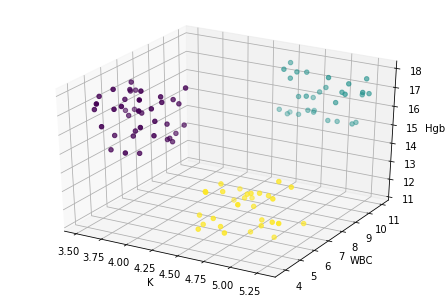

In [6]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

# Challenge 232 (_max score - 50 points_)
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [7]:
# Your code here

## Make a population of matrices

In [14]:
population=list()
population_size=100
# Initialization with each matrix given a random number of centroids each with random coordinates
for i in range(population_size):
    a=np.random.normal(size=[np.random.randint(2,10),3])
    a=a*EMR3d1.std(axis=0)+EMR3d1.mean(axis=0)
    population.append(a)

## Fitness Function

In [77]:
# Find nearest centroid
from sklearn.metrics import pairwise_distances_argmin_min
def fitness_centroids(centroids):
    # First get the closest centroids to each point, then compute score
    closest, min_distances = pairwise_distances_argmin_min(EMR3d1,centroids)
    ch_score = ch(EMR3d1,closest)
#     silhouette=silhouette_score(EMR3d1,closest)
#     wscc_norm = np.min([1,np.square(min_distances).mean()/np.square(np.std(EMR3d1,axis=0)).sum()])
#     return silhouette-wscc_norm
    return ch_score
def fitness_function(population):
    # score all centroids in population
    fitness_list=list()
    for centroids in population:
        try:
            fitness_list.append(fitness_centroids(centroids))
        except:
            fitness_list.append(-1)
    return fitness_list


In [78]:
# See what the "right" solution gives us
from sklearn.cluster import KMeans
km = KMeans()
km.fit(EMR3d1,3)
fitness_centroids(km.cluster_centers_)

270.18342766174874

## Biased selection


In [63]:
def biased_selection(pop, fitness, num_parents):
#     probabilities = (np.array(fitness)+2)/np.sum(np.array(fitness)+2)
#     choices = np.random.choice(np.arange(len(pop)),size=num_parents,p=probabilities,replace=False)
#     return [pop[i] for i in choices]
# Due to technical difficulties we are using the simple algorithm to choose top n chromosomes
    sorted_fitness_args = np.argsort(fitness)
    return [pop[i] for i in sorted_fitness_args[-num_parents:]]


## Recombination

In [79]:
# Allow recombination on different points in the two chromosomes
# pop1,pop2=population[1],population[2]
def recomb_2_chromosomes(pop1,pop2):
    # Finds a different random cut on each of the two chromosomes, thus allowing the chromosomes to change shape
    cut1 = np.random.randint(1,pop1.shape[0])
    cut2 = np.random.randint(1,pop2.shape[0])
    out1=np.vstack([pop1[:cut1,:],pop2[cut2:,:]])
    out2=np.vstack([pop2[:cut2,:],pop1[cut1:,:]])
    return out1,out2
def recombination(parents, offspring_size):
    offspring = list()
    parent_list = parents
    # randomly "pop" out a pair of chromosomes and recombine
    for k in range(0,offspring_size,2):
        parent1=parent_list.pop(np.random.randint(len(parents)))
        parent2=parent_list.pop(np.random.randint(len(parents)))
        out1,out2=recomb_2_chromosomes(parent1,parent2)
        offspring.append(out1)
        offspring.append(out2)
    return offspring


## Mutation

In [65]:
# mutation of points with random normal, *  std + mean, with probability p
def mutation_chrom(one_offspring,p=.1):
    return one_offspring+np.random.normal(size=one_offspring.shape)*EMR3d1.std(axis=0)*np.random.binomial(1,p,size=one_offspring.shape)

def mutation(offspring_recombination,mutation_rate):
    output=list()
    for offspring in offspring_recombination:
        output.append(mutation_chrom(offspring))
    return output


## Run


Evolution:
Generation =  0 	Best fitness =  308.16502
Generation =  0 \Mean silhoutte =  113.81733
Generation =  1 	Best fitness =  308.16502
Generation =  1 \Mean silhoutte =  122.5285
Generation =  2 	Best fitness =  308.16502
Generation =  2 \Mean silhoutte =  125.40704
Generation =  3 	Best fitness =  308.16502
Generation =  3 \Mean silhoutte =  119.45769
Generation =  4 	Best fitness =  308.16502
Generation =  4 \Mean silhoutte =  120.11699
Generation =  5 	Best fitness =  308.16502
Generation =  5 \Mean silhoutte =  114.0453
Generation =  6 	Best fitness =  247.14217
Generation =  6 \Mean silhoutte =  105.09059
Generation =  7 	Best fitness =  308.16502
Generation =  7 \Mean silhoutte =  106.01148
Generation =  8 	Best fitness =  266.91295
Generation =  8 \Mean silhoutte =  105.89912
Generation =  9 	Best fitness =  308.16502
Generation =  9 \Mean silhoutte =  101.82991
Generation =  10 	Best fitness =  308.16502
Generation =  10 \Mean silhoutte =  100.74666
Generation =  11 	Be

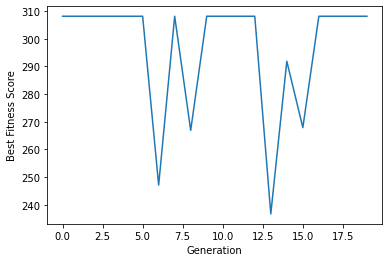

In [67]:
# GA Parameters
number_of_solutions = 500
number_of_parents = int(number_of_solutions/2)
# population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
mutation_rate=.2
wait_time=7
best_outputs = []

# Genesis
new_population=np.random.randint(10,size=[number_of_solutions,100])
new_population=list()
for i in range(number_of_solutions):
    a=np.random.normal(size=[np.random.randint(2,10),3])
    a=a*EMR3d1.std(axis=0)+EMR3d1.mean(axis=0)
    new_population.append(a)
fitness_list=[-np.inf]
break_count=0
# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):
    fitness = fitness_function(new_population )
    best_fitness=round(np.max(fitness),5)
    print("Generation = ", generation, "\tBest fitness = ", round(np.max(fitness),5))
    print("Generation = ", generation, "\Mean fitness = ", round(np.mean(np.array(fitness)),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(np.max(fitness),5))
# Now for the good part ;-) 
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination=recombination(parents,len(parents))
    offspring_mutation = mutation(offspring_recombination,mutation_rate)
    new_population = parents+offspring_mutation

    if best_fitness<=fitness_list[-1]:
        break_count+=1
    else:
        break_count=0
    if break_count>=wait_time:
        print("early ending",best_fitness,fitness_list[-1])
        break
    fitness_list.append(best_fitness)
#     print(break_count)

# Results
# print("\nThe population of the last generation: ")
# print(new_population)
fitness = fitness_function( new_population)
for n,fitness in enumerate(fitness):
    if fitness==np.max(fitness):
        best_match_idx=n
        break
# best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()